In [ ]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
import praw
import pprint

In [ ]:
secret = "Jl3tj7u4bno24vc-glxEwrV29ODmTg"
app_id = "HbYijXc8PLzi4VnHFY162Q"

reddit = praw.Reddit(
    client_id = app_id,
    client_secret = secret,
    user_agent = "Comment Extractions"
)

In [ ]:
url = "https://www.reddit.com/r/AskUK/comments/vtjw73/what_is_with_the_new_balaclava_craze/"
submission = reddit.submission(url = url)

In [ ]:
for n, top_level_comment in enumerate(submission.comments):
   if n == 9000:
    break

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [ ]:
for top_level_comment in submission.comments:
  print(type(top_level_comment))

<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'praw.models.reddit.comment.Comment'>
<class 'pr

In [ ]:
for n, comment in enumerate(submission.comments.list()):

  print(n, top_level_comment)
  


0 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
1 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
2 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
3 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
4 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
5 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
6 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
7 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
8 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
9 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
10 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
11 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'if8hatg', '...']>
12 <MoreComments count=158, children=['if8h20a', 'if8jdf7', 'i

In [ ]:
import pandas as pd
rows = []
for n, comment in enumerate(submission.comments.list()):
  if n == 9000:
    break
  try:
    if not comment.author: # not all comments have an author
      continue

    row = {"author": comment.author.name, 
         "body": comment.body, 
         "n_words": len(comment.body.split())}
    rows.append(row)
  except:
    pass

def count_characters(row):
  return len(row.body)

df = pd.DataFrame(rows)

# add a column containing the character count
df["chars"] = df.apply(count_characters, axis=1)
print(df)

# summary statistics
print(df["chars"].min(), df["chars"].max(), df["chars"].mean())

df.to_csv("comments-dataset.csv")


                   author                                               body  \
0         CustardCreamBot  **[This is marked as an answer](/r/AskUK/comme...   
1              Fezzverbal  Yea big UK craze, my 13 year old nephew wants ...   
2                Sht_Hawk  Part of being a teenager is copying your mates...   
3      twins_garage_horns  You sure he isn't a paramilitary? Does he star...   
4    Throwaway_Tenderloin  Probably because they've seen UK drill rappers...   
..                    ...                                                ...   
443         TheIvoryRaven  I mean you are right about it just being a fas...   
444   Wonderful-Army-6308  Your point being? They are dressed that way by...   
445        idontessaygood  Tbh i had to reread it several times to check ...   
446              Jorvac27  I miss the simple days of fully cladded lads i...   
447      TheClimbingBeard  We may be going full circle back to them, I'm ...   

     n_words  chars  
0         73    6

In [ ]:
import codecs

with codecs.open("comments-dataset.csv", "r", encoding='utf-8') as f:
  for line in f.readlines():
    if len(line) >= 10:
      print(line)



,author,body,n_words,chars

0,CustardCreamBot,"**[This is marked as an answer](/r/AskUK/comments/vtjw73/what_is_with_the_new_balaclava_craze/if7u1fw/), given by /u/6LegsGoExplore**:

 >Talking with lads that wear them, who are in fact, utter little shits that I have to deal with professionally, it appears to have grown out of mask wearing. All of a sudden no one challenges you for covering your face ... A balaclava conveniently covers both your face and your hair, leaving little in the way of identifying characteristics.

 [_^What ^is ^this?_](https://www.reddit.com/r/AskUK/comments/jjrte1/askuk_hits_200k_new_feature_mark_an_answer/)",73,605

1,Fezzverbal,"Yea big UK craze, my 13 year old nephew wants one. To wear with his big heavy coat in this weather. Apparently being a sweaty oik is the fashion 🤷",30,146

2,Sht_Hawk,Part of being a teenager is copying your mates and dressing like a twat,14,71

3,twins_garage_horns,You sure he isn't a paramilitary? Does he start shooting in the air 

In [ ]:
def common_case(text):
  return text.lower()

In [ ]:
def without_leading_trailing_whitespace(text):
  return text.strip()

In [ ]:
import re
def no_multi_punctuation(text):
  pattern = r"\!+"
  text = re.sub(pattern, "!", text)
  pattern = r"\?+"
  text = re.sub(pattern, "?", text)
  pattern = r"\$+"
  text = re.sub(pattern, "$", text)
  return text

In [ ]:
def no_retweets(text):
  keep = []
  for word in text.split():
    if not word.startswith("@"):
      keep.append(word)
  return ' '.join(keep)

In [ ]:
def no_http_links(text):
  keep = []
  for word in text.split():
    if not word.startswith("http"):
      keep.append(word)
  return ' '.join(keep)

In [ ]:
def preprocessing_pipeline(text):
  text = common_case(text)
  text = without_leading_trailing_whitespace(text)
  text = no_multi_punctuation(text)
  text = no_retweets(text)
  text = no_http_links(text)
  return text

preprocessing_pipeline("Up and Down https://www.google.com @dawdawawd jdwa!!!")

'up and down jdwa!'

In [ ]:
# change the pipeline to operate on a dict
def preprocessing_pipeline2(row):
  text = row["text"]
  text = common_case(text)
  text = without_leading_trailing_whitespace(text)
  text = no_multi_punctuation(text)
  text = no_retweets(text)
  text = no_http_links(text)
  return text
import codecs
with codecs.open("/content/comments-dataset.csv", "r", encoding='utf-8') as f:
  rows = [] 
  for line in f.readlines():
    if len(line) >= 10:
      rows.append({"text":line})

df = pd.DataFrame(rows)
df["cleaned_text"] = df.apply(preprocessing_pipeline2, axis=1)
df

,text,cleaned_text
0,",author,body,n_words,chars\n",",author,body,n_words,chars"
1,"0,CustardCreamBot,""**[This is marked as an ans...","0,custardcreambot,""**[this is marked as an ans..."
2,">Talking with lads that wear them, who are in...",">talking with lads that wear them, who are in ..."
3,[_^What ^is ^this?_](https://www.reddit.com/r...,[_^what ^is ^this?_](https://www.reddit.com/r/...
4,"1,Fezzverbal,""Yea big UK craze, my 13 year old...","1,fezzverbal,""yea big uk craze, my 13 year old..."
...,...,...
615,"443,TheIvoryRaven,I mean you are right about i...","443,theivoryraven,i mean you are right about i..."
616,"444,Wonderful-Army-6308,Your point being? They...","444,wonderful-army-6308,your point being? they..."
617,"445,idontessaygood,""Tbh i had to reread it sev...","445,idontessaygood,""tbh i had to reread it sev..."
618,"446,Jorvac27,I miss the simple days of fully c...","446,jorvac27,i miss the simple days of fully c..."


In [ ]:
def tweet_len(row):
  return len(row["cleaned_text"])

df["len"] = df.apply(tweet_len, axis=1)
df = df[df["len"] >= 10].copy()

In [ ]:
df

,text,cleaned_text,len
0,",author,body,n_words,chars\n",",author,body,n_words,chars",26
1,"0,CustardCreamBot,""**[This is marked as an ans...","0,custardcreambot,""**[this is marked as an ans...",153
2,">Talking with lads that wear them, who are in...",">talking with lads that wear them, who are in ...",342
3,[_^What ^is ^this?_](https://www.reddit.com/r...,[_^what ^is ^this?_](https://www.reddit.com/r/...,120
4,"1,Fezzverbal,""Yea big UK craze, my 13 year old...","1,fezzverbal,""yea big uk craze, my 13 year old...",168
...,...,...,...
615,"443,TheIvoryRaven,I mean you are right about i...","443,theivoryraven,i mean you are right about i...",167
616,"444,Wonderful-Army-6308,Your point being? They...","444,wonderful-army-6308,your point being? they...",308
617,"445,idontessaygood,""Tbh i had to reread it sev...","445,idontessaygood,""tbh i had to reread it sev...",111
618,"446,Jorvac27,I miss the simple days of fully c...","446,jorvac27,i miss the simple days of fully c...",135


In [ ]:
!pip install langdetect
from langdetect import detect

def language_code(row):
  try:
    return detect(row["cleaned_text"])
  except:
    return "Unknown"

df["lang"] = df.apply(language_code, axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=90c70ffbb521ba59a6ce8a48817050c32a74af738e1430768f64494b03c5f92f
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [ ]:
df

,text,cleaned_text,len,lang
0,",author,body,n_words,chars\n",",author,body,n_words,chars",26,en
1,"0,CustardCreamBot,""**[This is marked as an ans...","0,custardcreambot,""**[this is marked as an ans...",153,en
2,">Talking with lads that wear them, who are in...",">talking with lads that wear them, who are in ...",342,en
3,[_^What ^is ^this?_](https://www.reddit.com/r...,[_^what ^is ^this?_](https://www.reddit.com/r/...,120,en
4,"1,Fezzverbal,""Yea big UK craze, my 13 year old...","1,fezzverbal,""yea big uk craze, my 13 year old...",168,en
...,...,...,...,...
615,"443,TheIvoryRaven,I mean you are right about i...","443,theivoryraven,i mean you are right about i...",167,en
616,"444,Wonderful-Army-6308,Your point being? They...","444,wonderful-army-6308,your point being? they...",308,en
617,"445,idontessaygood,""Tbh i had to reread it sev...","445,idontessaygood,""tbh i had to reread it sev...",111,en
618,"446,Jorvac27,I miss the simple days of fully c...","446,jorvac27,i miss the simple days of fully c...",135,en


In [ ]:
df["lang"].value_counts().head(10)

en    582
it      8
cy      5
et      3
so      3
fi      2
tl      2
pl      2
fr      2
af      2
Name: lang, dtype: int64

In [ ]:
df["lang"].value_counts().tail(10)

pl    2
fr    2
af    2
ro    1
nl    1
lt    1
lv    1
no    1
pt    1
sq    1
Name: lang, dtype: int64

<Axes: title={'center': 'Commments Frequency of different Languages'}, ylabel='lang'>

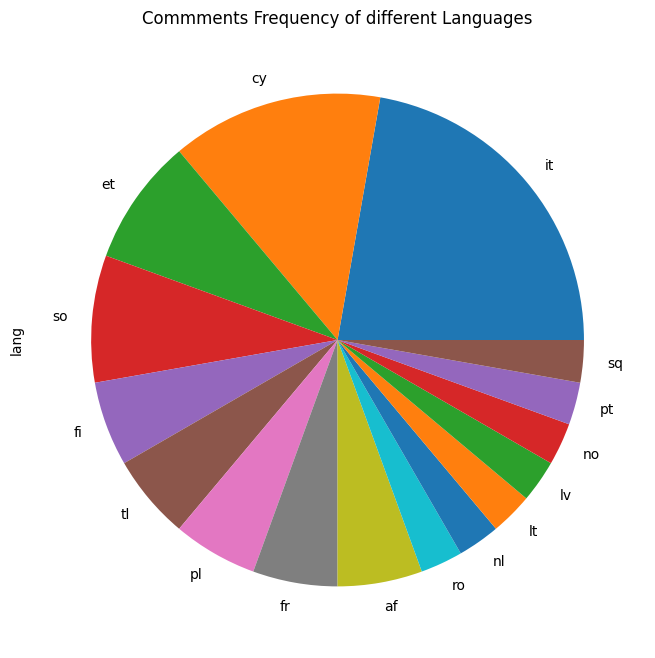

In [ ]:
df["lang"].value_counts().iloc[1:].plot(kind="pie", figsize = (12,8), title = "Commments Frequency of different Languages")

In [ ]:
df = df[df["lang"]=="en"].copy()
df

,text,cleaned_text,len,lang
0,",author,body,n_words,chars\n",",author,body,n_words,chars",26,en
1,"0,CustardCreamBot,""**[This is marked as an ans...","0,custardcreambot,""**[this is marked as an ans...",153,en
2,">Talking with lads that wear them, who are in...",">talking with lads that wear them, who are in ...",342,en
3,[_^What ^is ^this?_](https://www.reddit.com/r...,[_^what ^is ^this?_](https://www.reddit.com/r/...,120,en
4,"1,Fezzverbal,""Yea big UK craze, my 13 year old...","1,fezzverbal,""yea big uk craze, my 13 year old...",168,en
...,...,...,...,...
615,"443,TheIvoryRaven,I mean you are right about i...","443,theivoryraven,i mean you are right about i...",167,en
616,"444,Wonderful-Army-6308,Your point being? They...","444,wonderful-army-6308,your point being? they...",308,en
617,"445,idontessaygood,""Tbh i had to reread it sev...","445,idontessaygood,""tbh i had to reread it sev...",111,en
618,"446,Jorvac27,I miss the simple days of fully c...","446,jorvac27,i miss the simple days of fully c...",135,en


In [ ]:
import pandas as pd
df = pd.read_csv('/content/comments-dataset.csv')

In [ ]:
df.dtypes

Unnamed: 0     int64
author        object
body          object
n_words        int64
chars          int64
dtype: object

In [ ]:
df["n_words"].describe()

count    448.000000
mean      30.924107
std       38.695953
min        1.000000
25%        9.000000
50%       20.000000
75%       38.000000
max      336.000000
Name: n_words, dtype: float64

<Axes: title={'center': 'no. comments posted by the top 15 authors'}, xlabel='author', ylabel='comments'>

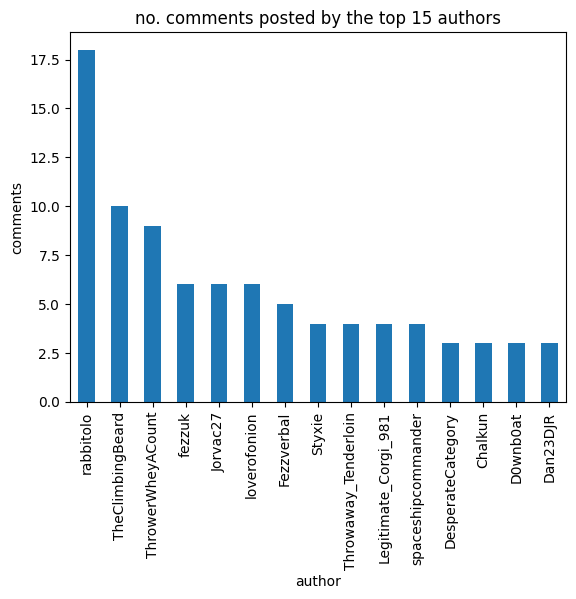

In [ ]:
df.groupby(df["author"]).size().sort_values(ascending=False).iloc[0:15].plot(kind="bar", ylabel="comments",
      title="no. comments posted by the top 15 authors")

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

def preprocess(row):
  text = row["body"]
  text = text.lower()
  keep = []
  for word in text.split():
    if word not in stopwords.words("english"):
      keep.append(word)
  return ' '.join(keep)

df["cleaned_body"] = df.apply(preprocess, axis=1)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0,author,body,n_words,chars,cleaned_body
0,0,CustardCreamBot,**[This is marked as an answer](/r/AskUK/comme...,73,605,**[this marked answer](/r/askuk/comments/vtjw7...
1,1,Fezzverbal,"Yea big UK craze, my 13 year old nephew wants ...",30,146,"yea big uk craze, 13 year old nephew wants one..."
2,2,Sht_Hawk,Part of being a teenager is copying your mates...,14,71,part teenager copying mates dressing like twat
3,3,twins_garage_horns,You sure he isn't a paramilitary? Does he star...,15,80,sure paramilitary? start shooting air funerals?
4,4,Throwaway_Tenderloin,Probably because they've seen UK drill rappers...,59,307,probably they've seen uk drill rappers wearing...
...,...,...,...,...,...,...
443,443,TheIvoryRaven,I mean you are right about it just being a fas...,30,142,mean right fashion trend would kind suck robbi...
444,444,Wonderful-Army-6308,Your point being? They are dressed that way by...,48,277,point being? dressed way designer. different c...
445,445,idontessaygood,Tbh i had to reread it several times to check ...,16,84,"tbh reread several times check commenting so, ..."
446,446,Jorvac27,I miss the simple days of fully cladded lads i...,20,115,miss simple days fully cladded lads tracksuits...


In [ ]:
from collections import Counter

word_counter = Counter()
for row in df.to_dict("records"):
  word_counter.update(row["cleaned_body"].split())
df_tf = pd.DataFrame(word_counter.most_common(200))
df_tf.columns = ["term", "frequency"]
df_tf

,term,frequency
0,like,105
1,wearing,61
2,people,57
3,one,49
4,wear,45
...,...,...
195,grow,6
196,group,6
197,him.,6
198,definitely,6


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
image = cloud.to_image()
image.save("wordcloud.png")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

nltk.download('brown')
nltk.download('punkt')
from collections import Counter
from textblob import TextBlob

noun_counter = Counter()
for tweet in df["cleaned_body"].to_list():
  blob = TextBlob(tweet)
  noun_counter.update(blob.noun_phrases)

for np in noun_counter.most_common(30):
  print(np)


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


('’ s', 47)
("i 'm", 15)
('drill music', 9)
('’ re', 9)
('i ’ m', 8)
('don ’ t', 7)
("i 've", 6)
('’ ve', 5)
('i ’ d', 5)
('luminous green luminous', 5)
('yellow ben sherman shirts', 5)
('onyx american football style tee xxl 5ft', 5)
('spliff acid smiley', 5)
('cringe days', 5)
('bad lad', 5)
('’ s classist', 5)
('lot kids', 4)
('good kid', 4)
('baggy karl kani jeans spliffy eclipse tees people', 4)
('reference drugs', 4)
("ca n't", 3)
('year olds', 3)
('’ t', 3)
('* *', 3)
('obscure identity', 3)
('i ’ ve', 3)
('new thing', 3)
('actual roadmen *', 3)
('’ ll', 3)
('fashion trend', 3)


In [ ]:
!pip install gensim
import gensim
import gensim.corpora as corpora

from pprint import pprint

documents = [comment.split() for comment in df["cleaned_body"]]
vocab = corpora.Dictionary(documents)
corpus = [vocab.doc2bow(text) for text in documents]

num_topics = 5
lda = gensim.models.LdaMulticore(corpus=corpus, id2word=vocab, num_topics=num_topics)
pprint(lda.print_topics())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[(0,
  '0.008*"like" + 0.006*"people" + 0.005*"it’s" + 0.005*"good" + 0.005*"drill" '
  '+ 0.005*"wear" + 0.004*"kids" + 0.004*"balaclava" + 0.004*"gang" + '
  '0.004*"he\'s"'),
 (1,
  '0.010*"like" + 0.007*"one" + 0.007*"wearing" + 0.005*"kids" + '
  '0.005*"people" + 0.004*"class" + 0.004*"he\'s" + 0.004*"look" + '
  '0.004*"wear" + 0.004*"think"'),
 (2,
  '0.012*"like" + 0.006*"think" + 0.006*"wearing" + 0.005*"people" + '
  '0.005*"one" + 0.004*"he\'s" + 0.004*"i\'m" + 0.004*"lot" + 0.003*"know" + '
  '0.003*"around"'),
 (3,
  '0.009*"like" + 0.007*"wearing" + 0.005*"one" + 0.005*"wear" + '
  '0.005*"people" + 0.004*"kids" + 0.004*"balaclava" + 0.004*"he\'s" + '
  '0.004*"he’s" + 0.003*"see"'),
 (4,
  '0.009*"like" + 0.007*"it’s" + 0.006*"people" + 0.005*"drill" + '
  '0.004*"wearing" + 0.004*"even" + 0.004*"face" + 0.003*"balaclava" + '
  '0.003*"wear" + 0.003*"chav"')]


In [ ]:
pd.DataFrame(lda.get_document_topics(corpus))

,0,1,2,3,4
0,"(0, 0.4327982)","(2, 0.55188847)",None,None,None
1,"(4, 0.96128863)",None,None,None,None
2,"(0, 0.025300276)","(1, 0.89887184)","(2, 0.025442723)","(3, 0.025212409)","(4, 0.025172768)"
3,"(0, 0.028623581)","(1, 0.8849771)","(2, 0.028937204)","(3, 0.028824368)","(4, 0.0286378)"
4,"(3, 0.9774793)",None,None,None,None
...,...,...,...,...,...
443,"(0, 0.0144348955)","(1, 0.94131094)","(2, 0.014686983)","(3, 0.014780453)","(4, 0.014786708)"
444,"(2, 0.9673417)",None,None,None,None
445,"(0, 0.018194132)","(1, 0.018277118)","(2, 0.92698574)","(3, 0.018255431)","(4, 0.018287595)"
446,"(0, 0.01440482)","(1, 0.014393291)","(2, 0.014372673)","(3, 0.014342031)","(4, 0.9424872)"


In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

import pydot

import pickle 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models
import os



# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/comments-dataset.csv'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda, corpus, vocab)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/comments-dataset.csv'+ str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.025738 -0.009298       1        1  25.026825
4      0.074953  0.005493       2        1  22.417998
0     -0.016152 -0.023218       3        1  18.932432
2     -0.010466 -0.034235       4        1  17.066741
3     -0.022598  0.061258       5        1  16.556005, topic_info=        Term        Freq       Total Category  logprob  loglift
2983     hmm  133.000000  133.000000  Default  30.0000  30.0000
258      car   50.000000   50.000000  Default  29.0000  29.0000
1975  spacex    8.000000    8.000000  Default  28.0000  28.0000
196    share   13.000000   13.000000  Default  27.0000  27.0000
32     tesla  143.000000  143.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
178     also    3.529356   25.350713   Topic5  -6.0802  -0.1733
156     make    3.599212   30.503971   Topic5  -6.0606  -0.3387
11     would    3.672277   34.906459   Topic5  -6.0405  -0.4534
6       need    3.370679   22.894968   Topic5  -6.1262  -0.1174
191     much    3.323185   22.555875   Topic5  -6.1404  -0.1167

[408 rows x 6 columns], token_table=      Topic      Freq                         Term
term                                              
1583      4  0.503242  ![img](emote|t5_2th52|4266)
2947      2  0.649303                        'mass
1926      2  0.649378                         (for
1103      4  0.503330               (new)**|[click
1104      4  0.742355                    **account
...     ...       ...                          ...
126       5  0.069317                        years
1123      4  0.742324                  year|[^scan
1285      1  0.680323                         yes,
1962      5  0.512708                       you...
1124      4  0.761396                            |

[691 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 3, 4])

In [ ]:
from nltk.collocations import *
tokens = nltk.wordpunct_tokenize("What is with the new balaclava craze?My nephew is 16 and insists on wearing a balaclava when he leaves the house. He has several, one of them isn't even really a balaclave as the whole face is cut out so it looks somewhat like his face is appearing from the top of a sock.")
finder = BigramCollocationFinder.from_words(tokens)

In [ ]:
tokens

['What',
 'is',
 'with',
 'the',
 'new',
 'balaclava',
 'craze',
 '?',
 'My',
 'nephew',
 'is',
 '16',
 'and',
 'insists',
 'on',
 'wearing',
 'a',
 'balaclava',
 'when',
 'he',
 'leaves',
 'the',
 'house',
 '.',
 'He',
 'has',
 'several',
 ',',
 'one',
 'of',
 'them',
 'isn',
 "'",
 't',
 'even',
 'really',
 'a',
 'balaclave',
 'as',
 'the',
 'whole',
 'face',
 'is',
 'cut',
 'out',
 'so',
 'it',
 'looks',
 'somewhat',
 'like',
 'his',
 'face',
 'is',
 'appearing',
 'from',
 'the',
 'top',
 'of',
 'a',
 'sock',
 '.']

In [ ]:
for k,v in finder.ngram_fd.items():
  print(k,v)

('What', 'is') 1
('is', 'with') 1
('with', 'the') 1
('the', 'new') 1
('new', 'balaclava') 1
('balaclava', 'craze') 1
('craze', '?') 1
('?', 'My') 1
('My', 'nephew') 1
('nephew', 'is') 1
('is', '16') 1
('16', 'and') 1
('and', 'insists') 1
('insists', 'on') 1
('on', 'wearing') 1
('wearing', 'a') 1
('a', 'balaclava') 1
('balaclava', 'when') 1
('when', 'he') 1
('he', 'leaves') 1
('leaves', 'the') 1
('the', 'house') 1
('house', '.') 1
('.', 'He') 1
('He', 'has') 1
('has', 'several') 1
('several', ',') 1
(',', 'one') 1
('one', 'of') 1
('of', 'them') 1
('them', 'isn') 1
('isn', "'") 1
("'", 't') 1
('t', 'even') 1
('even', 'really') 1
('really', 'a') 1
('a', 'balaclave') 1
('balaclave', 'as') 1
('as', 'the') 1
('the', 'whole') 1
('whole', 'face') 1
('face', 'is') 2
('is', 'cut') 1
('cut', 'out') 1
('out', 'so') 1
('so', 'it') 1
('it', 'looks') 1
('looks', 'somewhat') 1
('somewhat', 'like') 1
('like', 'his') 1
('his', 'face') 1
('is', 'appearing') 1
('appearing', 'from') 1
('from', 'the') 1
('t

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df = pd.read_csv('/content/comments-dataset.csv' , index_col=0)
df = df[df["body"].str.contains('balaclava')]

In [ ]:
def score(row):
  return sia.polarity_scores(row["body"])["compound"]

df["sentiment"] = df.apply(score, axis =1)

In [ ]:
df

,author,body,n_words,chars,sentiment
0,CustardCreamBot,**[This is marked as an answer](/r/AskUK/comme...,73,605,-0.5729
10,Tof12345,Downvote me all you want but this is a byprodu...,54,274,0.1901
19,darkaquamarine007,"I read baklava instead of balaclava, so I was ...",15,79,0.0828
22,boltonwanderer87,"The whole ""profiling"" conversation irritates m...",247,1382,-0.9687
27,wordsnows,The roadman aesthetic as worn in the mainstrea...,146,846,0.2739
40,Sad_You_1392,So I'm in the US. My husband is British. We wa...,36,174,-0.5423
47,SozWoW,If he's a big UK drill/rap fan and emulating h...,163,918,-0.5267
52,NSFWaccess1998,lot of kids especially middle class ones are g...,80,488,-0.1496
58,ElsaAzrael,"Wait, he’s wearing a balaclava in this heatwav...",120,611,0.7350
62,WoodyLaaadddddd03,An american Drill artist “Pooh Shiesty” has st...,44,241,0.0000


In [ ]:
df["sentiment"].describe()

count    53.000000
mean     -0.010251
std       0.596145
min      -0.978000
25%      -0.542300
50%       0.000000
75%       0.492600
max       0.990800
Name: sentiment, dtype: float64

<Axes: ylabel='Frequency'>

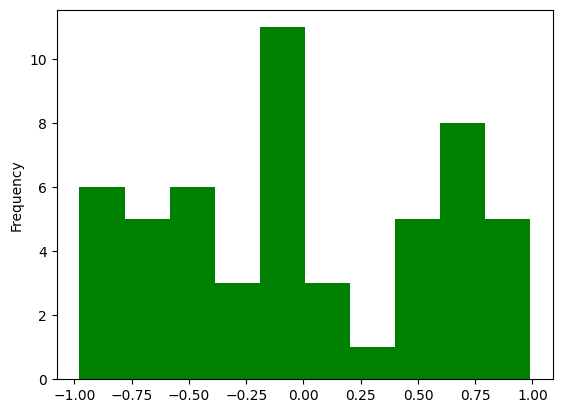

In [ ]:
df["sentiment"].plot(kind="hist" , color="g")

In [ ]:
df.sort_values(by="sentiment", ascending=False).head(10)[["body", "sentiment"]]

,body,sentiment
66,I’m 17 so I’ve got a bit of insight from the o...,0.9908
437,"Lmao same bud, I'm just playing with ya tbh. B...",0.9609
197,"He's not actually a bad lad, is a really sweet...",0.8883
138,Wearing balaclavas has been around for atleast...,0.8422
194,"Yeah, my gran used to knit me balaclavas. We m...",0.8268
327,"Honestly, look at some of the comments on here...",0.7856
261,Lmao glad I’m not the only one who thought of ...,0.7845
442,This is a worryingly paranoid viewpoint. What...,0.7681
58,"Wait, he’s wearing a balaclava in this heatwav...",0.7350
161,I've had a very long hard day and I'm not asha...,0.7059


In [ ]:
df.sort_values(by="sentiment", ascending=True).head(10)[["body", "sentiment"]]

,body,sentiment
270,Unless youre gong with him can you be sure of ...,-0.9780
22,"The whole ""profiling"" conversation irritates m...",-0.9687
142,"We need to outlaw hoodies, balaclavas and thre...",-0.9287
389,"I understand what classism is, you're just una...",-0.9233
273,"""Roadman"" may be inspired by drug dealer cultu...",-0.8578
153,“Why’s he wearing that balaclava?”\n“I dunno -...,-0.8426
430,>Your analogy doesn’t work. Race and class are...,-0.7783
78,Your nephew is a gang member out on road stabb...,-0.6860
362,That had a purpose though? Are we just suppose...,-0.6553
404,"No, it wasn't. But the news says numbers are r...",-0.6310


In [ ]:
nltk.download('movie_reviews')
nltk.download('punkt')


from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

analyzer = NaiveBayesAnalyzer()

def bayes_sentiment_class(row):
  blob = TextBlob(row["body"], analyzer= analyzer)
  if blob.sentiment.p_pos >= 0.6:
    return "Positive"
  if blob.sentiment.p_neg >= 0.6:
    return "Negative"
  return "Neutral"

df["bayes_sentiment"] = df.apply(bayes_sentiment_class, axis =1)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df

,author,body,n_words,chars,sentiment,bayes_sentiment
0,CustardCreamBot,**[This is marked as an answer](/r/AskUK/comme...,73,605,-0.5729,Negative
10,Tof12345,Downvote me all you want but this is a byprodu...,54,274,0.1901,Negative
19,darkaquamarine007,"I read baklava instead of balaclava, so I was ...",15,79,0.0828,Neutral
22,boltonwanderer87,"The whole ""profiling"" conversation irritates m...",247,1382,-0.9687,Positive
27,wordsnows,The roadman aesthetic as worn in the mainstrea...,146,846,0.2739,Positive
40,Sad_You_1392,So I'm in the US. My husband is British. We wa...,36,174,-0.5423,Positive
47,SozWoW,If he's a big UK drill/rap fan and emulating h...,163,918,-0.5267,Positive
52,NSFWaccess1998,lot of kids especially middle class ones are g...,80,488,-0.1496,Positive
58,ElsaAzrael,"Wait, he’s wearing a balaclava in this heatwav...",120,611,0.7350,Positive
62,WoodyLaaadddddd03,An american Drill artist “Pooh Shiesty” has st...,44,241,0.0000,Negative


<Axes: >

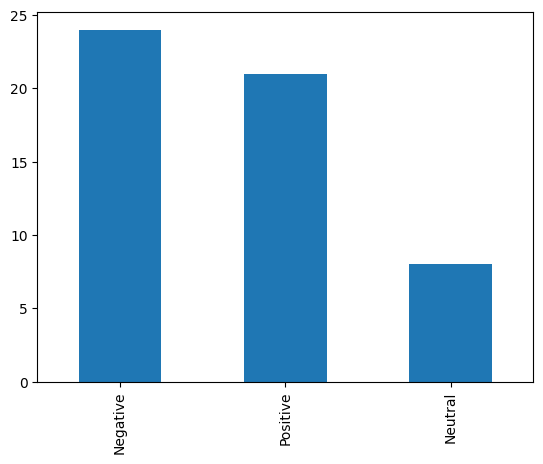

In [ ]:
df["bayes_sentiment"].value_counts().plot(kind="bar")